In [13]:
# first we need to upload the dataset from the keras and the deeplearing  framework (tensorflow)
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [14]:
# load the  cifar-10 dataset
# cifar 10 is a dataset which is used fort he image classifiactin.
#tensorflow provide built-in support to cifar10 so  directly load without downloading manually
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
# original pixel values to range 0 t0 255  so we convert into the samller value we need to divide by 255 so we getthe decimal value between the 0 to 1 adn then addintio n and the multiplication also easily done
x_train  = x_train.astype('float32')/ 255.0
x_test =x_test.astype('float32')/255.0


In [16]:
# convert integer lables into one-shot encoded vectors  each integer into 10 length (calsses)
y_train =to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [17]:
# here we use the 15% of the training data  for the purpose of the valiation
#validation use to find out model overfitting and the underfitting while training
val_size = int(0.15*x_train.shape[0])
x_val = x_train[:val_size]
y_val = y_train[:val_size]


In [18]:
x_train = x_train[val_size:]
y_train = y_train[val_size:]

In [19]:
# verify that data we split is correct or not
print(f"Training data set size: {x_train.shape}, {y_train.shape}")
print(f"Validation data set size: {x_val.shape}, {y_val.shape}")
print(f"Test  data set size: {x_test.shape}, {y_test.shape}")


Training data set shape: (42500, 32, 32, 3), (42500, 10)
Validation data set shape: (7500, 32, 32, 3), (7500, 10)
Test  data set shape: (10000, 32, 32, 3), (10000, 10)


In [20]:
from tensorflow.keras.models import Sequential

model = Sequential()


In [21]:
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D

# Conv → BatchNorm → ReLU → Pool




In [22]:
# 1st convolutional block
model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# 2nd  convolutional block
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [24]:
# 3rd convolutional block
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



In [25]:
 # flatten and dense layers

from tensorflow.keras.layers import Flatten, Dense, Dropout

In [26]:
model.add(Flatten())            # 2d to 1d
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))        #avoid overfitting

In [27]:
# out put layer

model.add(Dense(10, activation='softmax'))


In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


callbacks and learning rate

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [30]:
#stop training if validation not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

training and the validation of the data set

In [32]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 77s 112ms/step - accuracy: 0.3224 - loss: 1.9552 - val_accuracy: 0.5247 - val_loss: 1.3024 - learning_rate: 0.0010
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 79s 108ms/step - accuracy: 0.5156 - loss: 1.3380 - val_accuracy: 0.5104 - val_loss: 1.4332 - learning_rate: 0.0010
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.5764 - loss: 1.1682 - val_accuracy: 0.5657 - val_loss: 1.2398 - learning_rate: 0.0010
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.6139 - loss: 1.0824 - val_accuracy: 0.6112 - val_loss: 1.0720 - learning_rate: 0.0010
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.6415 - loss: 1.0027 - val_accuracy: 0.6765 - val_loss: 0.9544 - learning_rate: 0.0010
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 73s 109ms/step - accuracy: 0.6678 - loss: 0.9397 - val_accuracy: 0.7040 - val_loss: 0.8484 - learning_rate: 0.0010
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.6

In [33]:
# checking   the trainning
import matplotlib.pyplot as plt


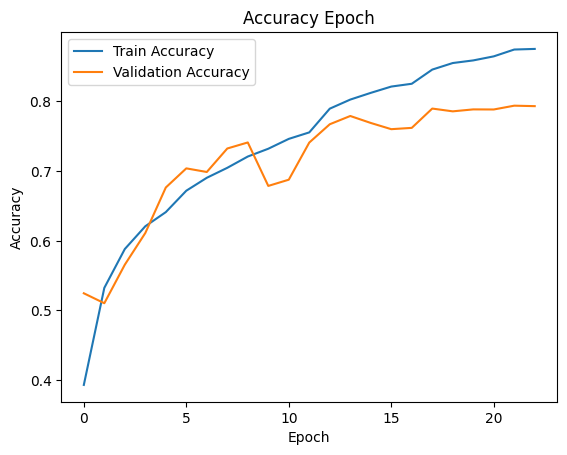

In [35]:
# accuracy of the data trian
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

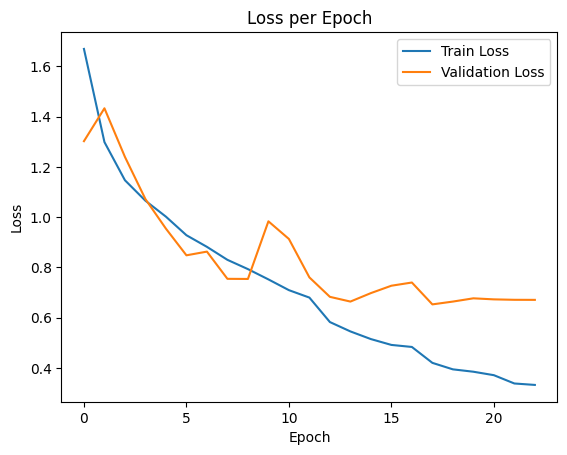

In [36]:
#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


TESTING

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

#accuracy and loss on test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7823 - loss: 0.6950
Test Loss: 0.7044, Test Accuracy: 0.7808


predication

In [38]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
y_probs = model.predict(x_test)
y_pred = np.argmax(y_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [40]:
# print
print(classification_report(y_true, y_pred, target_names=[
    'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']))

              precision    recall  f1-score   support

    airplane       0.81      0.80      0.81      1000
  automobile       0.91      0.90      0.90      1000
        bird       0.71      0.66      0.69      1000
         cat       0.55      0.70      0.62      1000
        deer       0.74      0.75      0.75      1000
         dog       0.74      0.59      0.66      1000
        frog       0.78      0.89      0.83      1000
       horse       0.90      0.75      0.82      1000
        ship       0.84      0.90      0.87      1000
       truck       0.89      0.86      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [41]:
 # Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

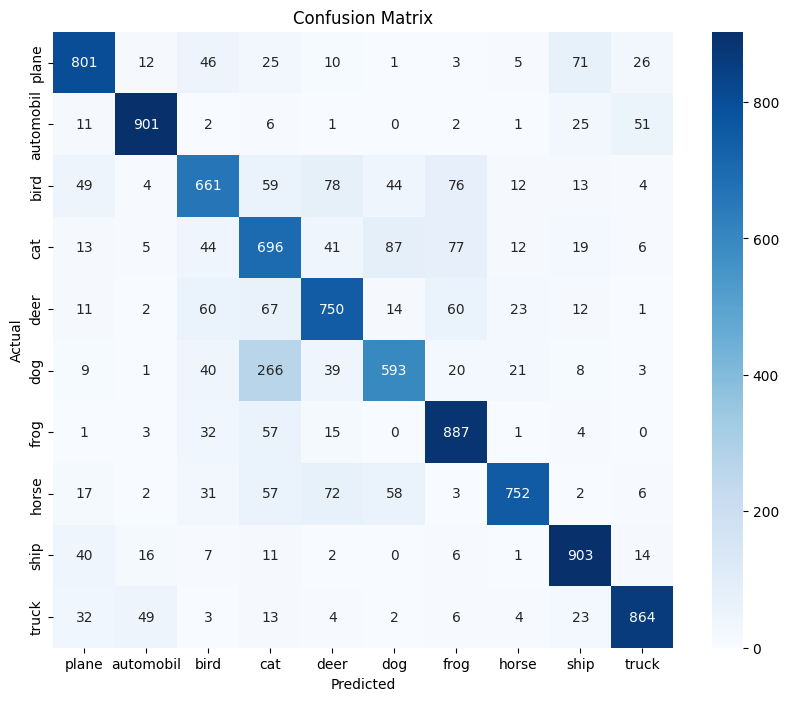

In [42]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['plane','automobil','bird','cat','deer','dog','frog','horse','ship','truck'],
            yticklabels=['plane','automobil','bird','cat','deer','dog','frog','horse','ship','truck'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

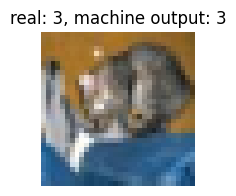

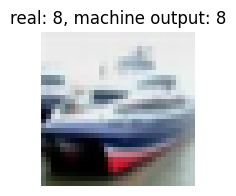

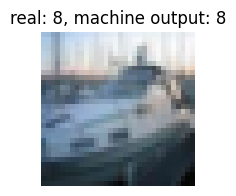

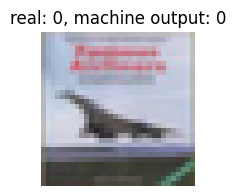

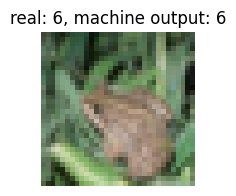

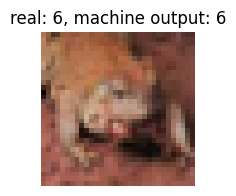

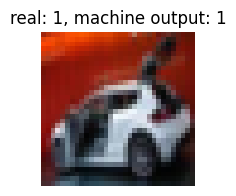

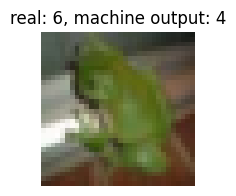

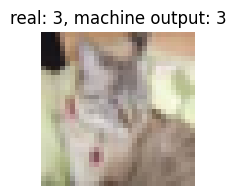

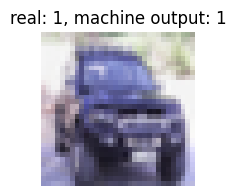

In [43]:
# some image checking

for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i])
    plt.title(f"real: {y_true[i]}, machine output: {y_pred[i]}")
    plt.axis('off')
    plt.show()


In [46]:
from google.colab import files
files.download('cnn_cifar10_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
model.save('cnn_cifar10_model.h5')